In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report)
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,VotingClassifier,StackingClassifier

In [2]:
df = pd.read_csv(r"E:\Pakistan Diabetes Project\Pakistani_Diabetes_Dataset.csv")

## 📄 Diabetes Dataset — Column Descriptions

This dataset contains medical, demographic, and lifestyle information of patients, used to predict diabetes outcomes.

| Column     | Description |
|------------|-------------|
| **Age**        | Age of the patient (in years) |
| **Gender**     | Gender (1 = Male, 0 = Female) |
| **Rgn**        | Region code (categorical; e.g., 0 = Urban, 1 = Rural or vice versa) |
| **wt**         | Weight (likely in kilograms) |
| **BMI**        | Body Mass Index — indicator of body fat (kg/m²) |
| **wst**        | Waist circumference (in inches or cm) |
| **sys**        | Systolic blood pressure (top number) |
| **dia**        | Diastolic blood pressure (bottom number) |
| **his**        | Family history of diabetes (1 = Yes, 0 = No) |
| **A1c**        | Hemoglobin A1c (%) — average blood sugar over 3 months |
| **B.S.R**      | Blood Sugar Random — non-fasting glucose level (mg/dL) |
| **vision**     | Vision issues (1 = Yes, 0 = No) |
| **Exr**        | Exercise level (e.g., minutes per day or activity score) |
| **dipsia**     | Excessive thirst (1 = Yes, 0 = No) — a symptom of diabetes |
| **uria**       | Presence of sugar or protein in urine (1 = Yes, 0 = No) |
| **Dur**        | Duration (in years) since diabetes was diagnosed |
| **neph**       | Kidney complications / nephropathy (1 = Yes, 0 = No) |
| **HDL**        | HDL cholesterol level (good cholesterol) |
| **Outcome**    | Diabetes status (1 = Diabetic, 0 = Non-diabetic) ← Target variable |

### 🧠 Notes:
- The dataset combines biological, lifestyle, and clinical features.
- Some features are binary, while others are continuous.
- Useful for classification models (e.g., logistic regression, random forest, etc.)


In [3]:
df.head()

,Age,Gender,Rgn,wt,BMI,wst,sys,dia,his,A1c,B.S.R,vision,Exr,dipsia,uria,Dur,neph,HDL,Outcome
0,60.0,1,0,76.0,29.90,41.0,130,90,0,8.90,278,0,30,1,0,5.0,0,60,1
1,57.0,1,1,64.0,24.30,39.0,120,80,1,8.50,165,0,20,1,1,20.0,0,42,1
2,58.0,0,0,73.0,25.20,34.0,140,90,0,5.65,130,1,20,0,0,0.0,0,54,0
3,27.0,0,1,60.0,22.01,30.0,110,70,0,5.00,95,0,15,0,0,0.0,0,57,0
4,56.0,1,0,70.0,25.80,43.0,125,90,0,8.30,139,1,40,1,0,5.0,1,53,1


In [4]:
df.sample(5)

,Age,Gender,Rgn,wt,BMI,wst,sys,dia,his,A1c,B.S.R,vision,Exr,dipsia,uria,Dur,neph,HDL,Outcome
687,56.0,0,0,80.0,27.60,41.0,170,80,1,7.9,224,1,20,0,1,2.5,1,38,1
892,22.0,0,0,85.0,28.49,28.0,133,79,0,5.2,93,1,30,0,0,0.0,0,50,0
688,50.0,1,0,66.0,26.61,39.0,125,90,0,11.0,199,0,0,1,0,4.0,1,41,1
555,21.0,0,0,80.0,19.60,34.0,110,74,0,4.4,92,1,20,0,0,0.0,0,51,0
15,55.0,1,0,65.0,26.20,42.0,150,100,0,6.4,80,0,30,0,0,1.0,0,36,1


In [5]:
df.shape

(912, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      912 non-null    float64
 1   Gender   912 non-null    int64  
 2   Rgn      912 non-null    int64  
 3   wt       912 non-null    float64
 4   BMI      912 non-null    float64
 5   wst      912 non-null    float64
 6   sys      912 non-null    int64  
 7   dia      912 non-null    int64  
 8   his      912 non-null    int64  
 9   A1c      912 non-null    float64
 10  B.S.R    912 non-null    int64  
 11  vision   912 non-null    int64  
 12  Exr      912 non-null    int64  
 13  dipsia   912 non-null    int64  
 14  uria     912 non-null    int64  
 15  Dur      912 non-null    float64
 16  neph     912 non-null    int64  
 17  HDL      912 non-null    int64  
 18  Outcome  912 non-null    int64  
dtypes: float64(6), int64(13)
memory usage: 135.5 KB


In [7]:
df.describe()

,Age,Gender,Rgn,wt,BMI,wst,sys,dia,his,A1c,B.S.R,vision,Exr,dipsia,uria,Dur,neph,HDL,Outcome
count,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000
mean,36.318531,0.551535,0.289474,69.363158,25.628164,35.463268,129.642544,82.347588,0.585526,6.859923,165.471491,0.489035,14.429825,0.379386,0.327851,2.112939,0.171053,45.960526,0.532895
std,13.521001,0.497610,0.453767,12.170322,8.247651,3.894227,19.760794,11.831177,0.492901,2.196497,84.727090,0.500154,15.601849,0.485500,0.469688,2.964896,0.376762,6.807417,0.499191
min,12.000000,0.000000,0.000000,30.000000,2.840000,24.000000,90.000000,20.000000,0.000000,0.100000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000
25%,22.750000,0.000000,0.000000,60.000000,22.500000,32.500000,120.000000,73.000000,0.000000,5.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.000000,0.000000
50%,36.000000,1.000000,0.000000,69.000000,25.235000,35.000000,126.000000,80.000000,1.000000,6.100000,130.500000,0.000000,15.000000,0.000000,0.000000,1.000000,0.000000,46.000000,1.000000
75%,48.000000,1.000000,1.000000,77.000000,28.300000,38.000000,138.000000,90.000000,1.000000,8.500000,217.250000,1.000000,25.000000,1.000000,1.000000,3.500000,0.000000,51.000000,1.000000
max,70.000000,1.000000,1.000000,110.000000,233.790000,67.000000,245.000000,115.000000,1.000000,14.000000,464.000000,1.000000,120.000000,1.000000,1.000000,25.000000,1.000000,62.000000,1.000000


In [8]:
pie = df["Outcome"].value_counts()
pie

Outcome
1    486
0    426
Name: count, dtype: int64

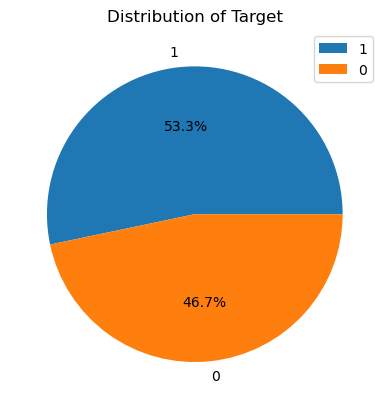

In [9]:
plt.pie(pie.values,labels = pie.index,autopct = "%1.1f%%")
plt.title("Distribution of Target")
plt.legend()
plt.show()

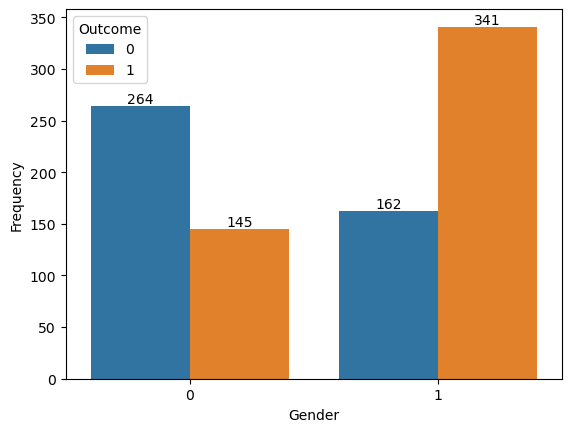

In [10]:
ax = sns.countplot(x = df["Gender"],hue = df["Outcome"])
for i in ax.containers:
    ax.bar_label(i)
plt.ylabel("Frequency")
plt.show()

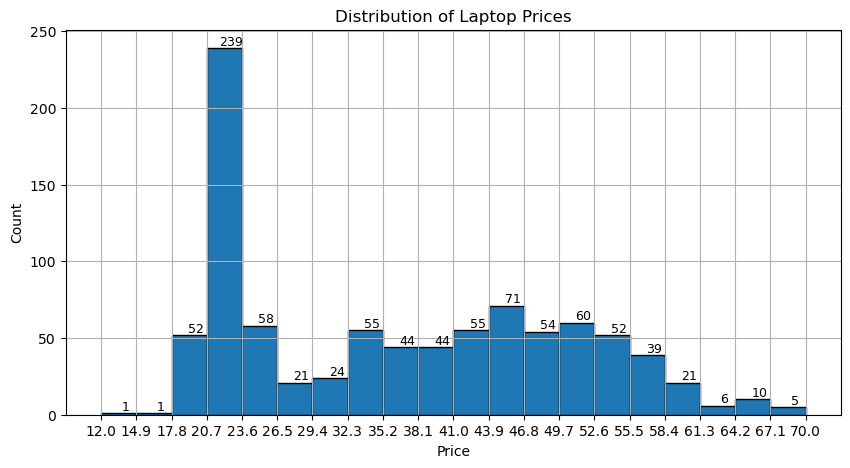

In [11]:
plt.figure(figsize= (10,5))
counts, bin_edges, _ = plt.hist(df["Age"], bins=20, edgecolor='black')
plt.xticks(bin_edges)
for count, x in zip(counts, bin_edges):
    plt.text(x + 2, count, str(int(count)), ha='center', va='bottom', fontsize=9)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Distribution of Laptop Prices")
plt.grid(True)
plt.show()

<Axes: ylabel='Age'>

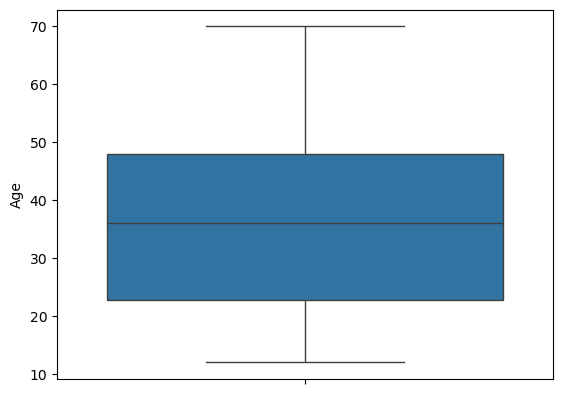

In [12]:
sns.boxplot(data = df["Age"])

<Axes: ylabel='BMI'>

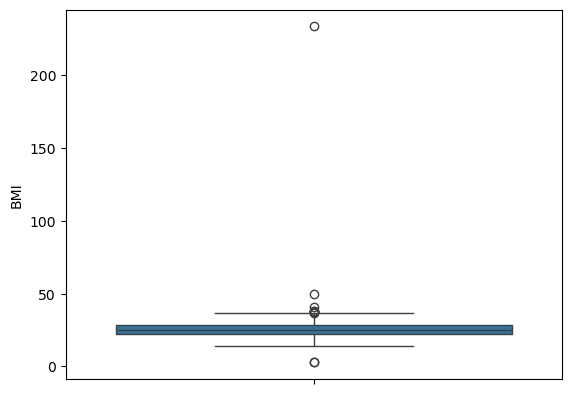

In [13]:
sns.boxplot(data = df["BMI"])

In [14]:
df.shape

(912, 19)

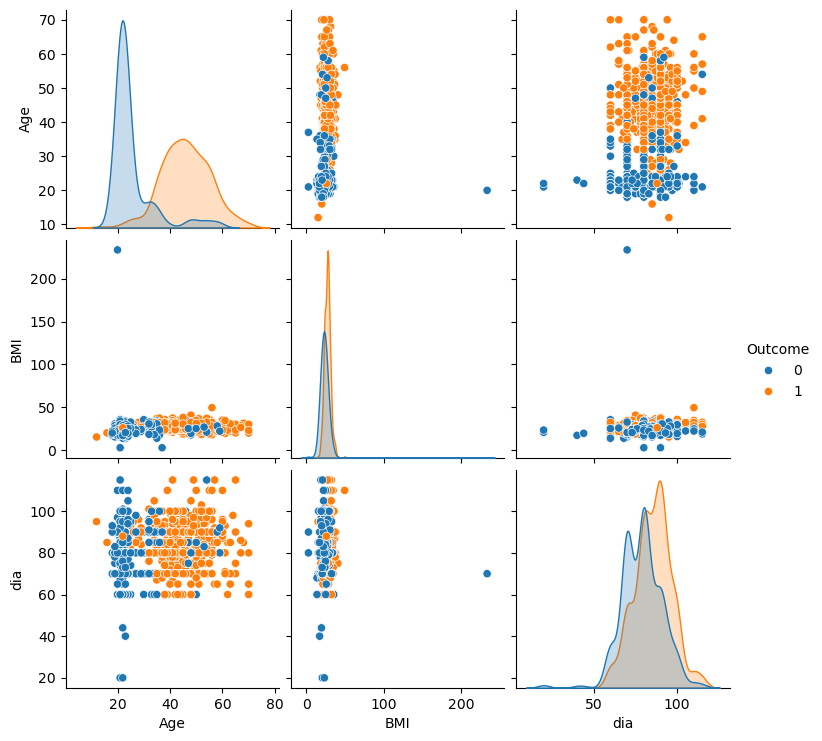

In [15]:
sns.pairplot(df[["Age","BMI","Outcome","dia"]], hue="Outcome")

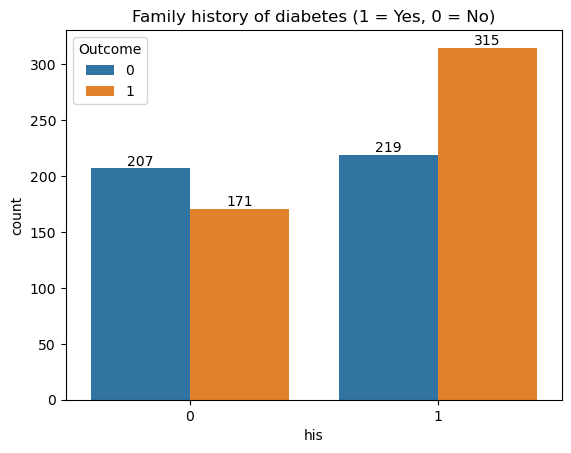

In [16]:
ax = sns.countplot(x = df["his"],hue = df["Outcome"])
plt.title("Family history of diabetes (1 = Yes, 0 = No)")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

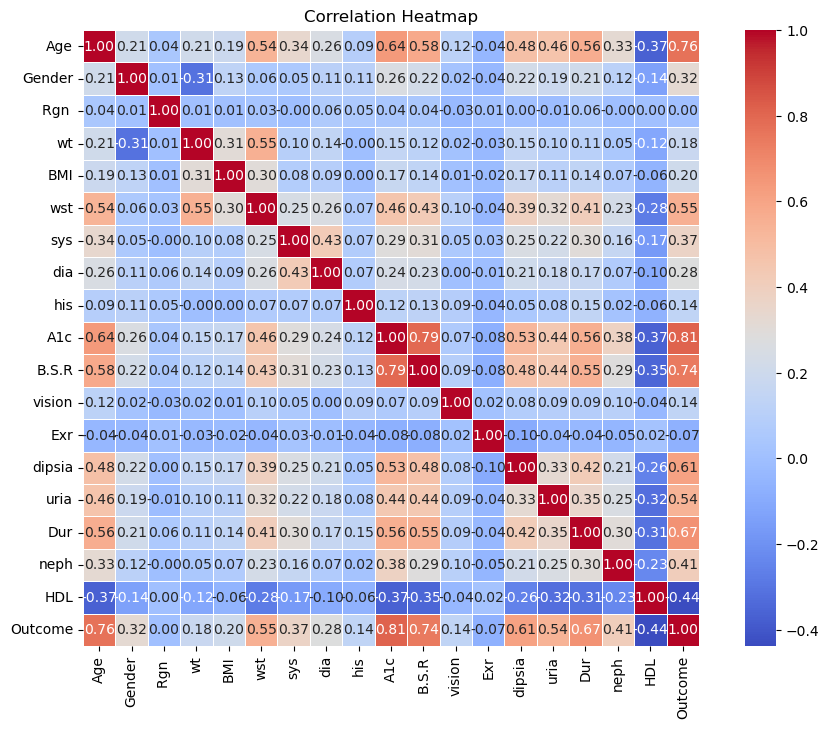

In [17]:
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
x = df.drop(columns=['Outcome',"Dur"])
y = df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify = y)

In [20]:
y_test.value_counts()

Outcome
1    98
0    85
Name: count, dtype: int64

In [21]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

yhat1 = lr.predict(x_test)
yhat2 = lr.predict(x_train)
print("Accuracy:", accuracy_score(y_train, yhat2))
print("Accuracy:", accuracy_score(y_test, yhat1))
print("Classification Report:\n", classification_report(y_test, yhat1))
print("Confusion Matrix:\n", confusion_matrix(y_test, yhat1))

Accuracy: 0.9725651577503429
Accuracy: 0.9726775956284153
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97        85
           1       0.97      0.98      0.97        98

    accuracy                           0.97       183
   macro avg       0.97      0.97      0.97       183
weighted avg       0.97      0.97      0.97       183

Confusion Matrix:
 [[82  3]
 [ 2 96]]


In [22]:
rfc = RandomForestClassifier(n_estimators=100, random_state=2)
rfc.fit(x_train,y_train)
yhat1 = rfc.predict(x_test)
yhat2 = rfc.predict(x_train)
print("Accuracy:", accuracy_score(y_train, yhat2))
print("Accuracy:", accuracy_score(y_test, yhat1))
print("Classification Report:\n", classification_report(y_test, yhat1))
print("Confusion Matrix:\n", confusion_matrix(y_test, yhat1))

Accuracy: 1.0
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        98

    accuracy                           1.00       183
   macro avg       1.00      1.00      1.00       183
weighted avg       1.00      1.00      1.00       183

Confusion Matrix:
 [[85  0]
 [ 0 98]]


In [23]:
dt = DecisionTreeClassifier(random_state = 3)
dt.fit(x_train,y_train)
yhat2 = dt.predict(x_train)
print("Accuracy:", accuracy_score(y_train, yhat2))
print("Accuracy:", accuracy_score(y_test, yhat1))
print("Classification Report:\n", classification_report(y_test, yhat1))
print("Confusion Matrix:\n", confusion_matrix(y_test, yhat1))

Accuracy: 1.0
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        98

    accuracy                           1.00       183
   macro avg       1.00      1.00      1.00       183
weighted avg       1.00      1.00      1.00       183

Confusion Matrix:
 [[85  0]
 [ 0 98]]


In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
yhat = knn.predict(x_test)
yhat2 = knn.predict(x_train)
print("Accuracy:", accuracy_score(y_train, yhat2))
print("Accuracy:", accuracy_score(y_test, yhat1))
print("Classification Report:\n", classification_report(y_test, yhat1))
print("Confusion Matrix:\n", confusion_matrix(y_test, yhat1))

Accuracy: 0.9753086419753086
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        98

    accuracy                           1.00       183
   macro avg       1.00      1.00      1.00       183
weighted avg       1.00      1.00      1.00       183

Confusion Matrix:
 [[85  0]
 [ 0 98]]


In [25]:
et = ExtraTreesClassifier(n_estimators=200,
                              random_state=3)
et.fit(x_train,y_train)
yhat = et.predict(x_test)
yhat2 = et.predict(x_train)
print("Accuracy:", accuracy_score(y_train, yhat2))
print("Accuracy:", accuracy_score(y_test, yhat1))
print("Classification Report:\n", classification_report(y_test, yhat1))
print("Confusion Matrix:\n", confusion_matrix(y_test, yhat1))

Accuracy: 1.0
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        98

    accuracy                           1.00       183
   macro avg       1.00      1.00      1.00       183
weighted avg       1.00      1.00      1.00       183

Confusion Matrix:
 [[85  0]
 [ 0 98]]


In [26]:
ab = AdaBoostClassifier(n_estimators=200,
                              random_state=3,
                              )
ab.fit(x_train,y_train)
yhat = ab.predict(x_test)
yhat2 = ab.predict(x_train)
print("Accuracy:", accuracy_score(y_train, yhat2))
print("Accuracy:", accuracy_score(y_test, yhat1))
print("Classification Report:\n", classification_report(y_test, yhat1))
print("Confusion Matrix:\n", confusion_matrix(y_test, yhat1))

Accuracy: 1.0
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        98

    accuracy                           1.00       183
   macro avg       1.00      1.00      1.00       183
weighted avg       1.00      1.00      1.00       183

Confusion Matrix:
 [[85  0]
 [ 0 98]]


In [27]:
print(yhat1[0:10])
print(np.array(y_test[0:10]))

[0 1 1 1 0 0 0 1 0 1]
[0 1 1 1 0 0 0 1 0 1]


In [28]:
prpba = ab.predict_proba(x_test)[:, 1]
prpba[0:10]

array([0.36713758, 0.64886729, 0.64493469, 0.69984156, 0.37288673,
       0.34573746, 0.32025594, 0.67248601, 0.49198681, 0.70347069])

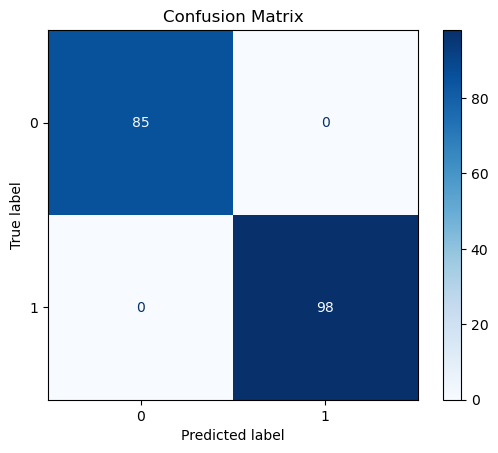

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, yhat1, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

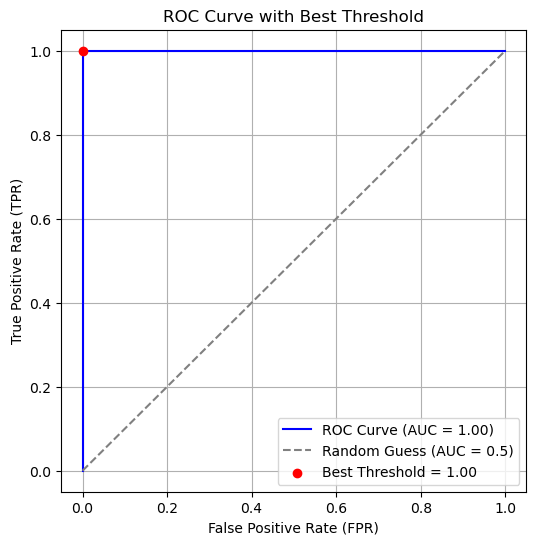

✅ Best Threshold: 1.0000


In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


fpr, tpr, thresholds = roc_curve(y_test, yhat1)
auc_score = roc_auc_score(y_test, yhat1)

j_scores = tpr - fpr
best_index = j_scores.argmax()
best_threshold = thresholds[best_index]

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess (AUC = 0.5)')

plt.scatter(fpr[best_index], tpr[best_index], color='red', label=f'Best Threshold = {best_threshold:.2f}', zorder=5)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve with Best Threshold')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"✅ Best Threshold: {best_threshold:.4f}")

In [33]:
healthy_person = [
  35,    # Age
  1,     # Gender (Male)
  0,     # Region (Urban)
  68,    # Weight (kg)
  22.5,  # BMI
  32,    # Waist circumference (cm/in)
  115,   # Systolic BP
  75,    # Diastolic BP
  0,     # Family history (No)
  5.0,   # A1c (%)
  90,    # Random blood sugar (mg/dL)
  0,     # Vision issue (No)
  30,    # Exercise (minutes/day)
  0,     # Dipsia (No)
  0,     # Uria (No)
  0,     # Nephropathy (No)
  55     # HDL cholesterol
]

In [42]:
new_record = np.array([healthy_person])
prediction = ab.predict(new_record)
probability = ab.predict_proba(new_record)
print("Predicted Outcome:", prediction[0])
print(probability)

Predicted Outcome: 0
[[0.6703371 0.3296629]]


In [35]:
diabetic_person = [
  55,    # Age
  0,     # Gender (Female)
  1,     # Region (Rural)
  85,    # Weight (kg)
  32.5,  # BMI
  40,    # Waist circumference (cm/in)
  145,   # Systolic BP
  90,    # Diastolic BP
  1,     # Family history (Yes)
  8.2,   # A1c (%)
  240,   # Random blood sugar (mg/dL)
  1,     # Vision issue (Yes)
  5,     # Exercise (very low)
  1,     # Dipsia (Yes)
  1,     # Uria (Yes)
  1,     # Nephropathy (Yes)
  35     # HDL cholesterol
]


In [36]:
new_record = np.array([diabetic_person])
prediction = ab.predict(new_record)

print("Predicted Outcome:", prediction[0])

Predicted Outcome: 1


Age	Gender	Rgn	wt	BMI	wst	sys	dia	his	A1c	B.S.R	vision	Exr	dipsia	uria	Dur	neph	HDL	Outcome

In [37]:
columns = [
    'Age', 'Gender', 'Rgn', 'wt', 'BMI', 'wst', 'sys', 'dia',
    'his', 'A1c', 'B.S.R', 'vision', 'Exr', 'dipsia',
    'uria', 'Dur', 'neph', 'HDL'
]

# Sample records (4 healthy, 4 diabetic)
healthy_records = [
    [35, 1, 0, 68, 22.5, 32, 115, 75, 0, 5.0, 90, 0, 30, 0, 0, 0, 0, 55],
    [28, 1, 1, 65, 21.7, 30, 110, 70, 0, 4.8, 85, 0, 40, 0, 0, 0, 0, 60],
    [40, 0, 0, 70, 23.2, 34, 118, 76, 0, 5.1, 95, 0, 25, 0, 0, 0, 0, 53],
    [30, 1, 0, 72, 22.8, 33, 112, 74, 0, 5.3, 100, 0, 35, 0, 0, 0, 0, 58]
]

diabetic_records = [
    [55, 0, 1, 85, 32.5, 40, 145, 90, 1, 8.2, 240, 1, 5, 1, 1, 6, 1, 35],
    [60, 1, 0, 90, 33.8, 42, 150, 92, 1, 9.1, 260, 1, 0, 1, 1, 8, 1, 32],
    [52, 0, 1, 80, 30.9, 38, 142, 88, 1, 7.5, 220, 1, 10, 1, 1, 5, 1, 37],
    [58, 0, 1, 88, 34.2, 43, 148, 91, 1, 8.7, 245, 1, 2, 1, 1, 7, 1, 33]
]


data = healthy_records + diabetic_records
outcomes = [0]*len(healthy_records) + [1]*len(diabetic_records)
df_sample = pd.DataFrame(data, columns=columns)
df_sample['Outcome'] = outcomes
df_sample.head(8)

,Age,Gender,Rgn,wt,BMI,wst,sys,dia,his,A1c,B.S.R,vision,Exr,dipsia,uria,Dur,neph,HDL,Outcome
0,35,1,0,68,22.5,32,115,75,0,5.0,90,0,30,0,0,0,0,55,0
1,28,1,1,65,21.7,30,110,70,0,4.8,85,0,40,0,0,0,0,60,0
2,40,0,0,70,23.2,34,118,76,0,5.1,95,0,25,0,0,0,0,53,0
3,30,1,0,72,22.8,33,112,74,0,5.3,100,0,35,0,0,0,0,58,0
4,55,0,1,85,32.5,40,145,90,1,8.2,240,1,5,1,1,6,1,35,1
5,60,1,0,90,33.8,42,150,92,1,9.1,260,1,0,1,1,8,1,32,1
6,52,0,1,80,30.9,38,142,88,1,7.5,220,1,10,1,1,5,1,37,1
7,58,0,1,88,34.2,43,148,91,1,8.7,245,1,2,1,1,7,1,33,1


In [38]:
g = df_sample.drop(["Outcome","Dur"],axis = 1)

In [39]:
g.columns = x_train.columns

In [40]:
ab.predict(g)

array([0, 0, 0, 0, 1, 1, 1, 1])

In [41]:
import joblib
joblib.dump(ab, 'model_ab.pkl')

['model_ab.pkl']